# Estudo sobre o Preço do seguro saúde 

Link do kaggle: https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction

Descrição geral do conjunto de dados:

O conjunto de dados sobre seguros médicos contém informações sobre uma série de factores que podem afetar as despesas médicas, incluindo a idade, o sexo, o IMC, o estatuto de fumador, o número de filhos e a região. Este conjunto de dados pode ser utilizado para treinar um modelo de aprendizagem automática que pode prever despesas médicas para novos clientes.

Para fornecer informações sobre os principais factores que contribuem para o aumento dos custos dos seguros e ajudar a empresa a tomar decisões mais informadas em matéria de preços e avaliação de riscos.

O conjunto de dados contém 2,7 mil linhas e 7 colunas
As colunas incluem

- Idade
- Sexo
- IMC (Índice de Massa Corporal)
- Crianças
- Fumador
- Região
- Cargas

Declaração do problema:

- Quais são os factores mais importantes que afectam as despesas médicas?
- Em que medida podem os modelos de aprendizagem automática prever as despesas médicas?
- Como é que os modelos de aprendizagem automática podem ser utilizados para melhorar a eficiência e a rentabilidade das companhias de seguros de saúde?

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix
import xgboost as xgb
from sklearn.feature_selection import SelectKBest

# 1. Dataset 

In [13]:
data = pd.read_csv('Medical_insurance.csv')

In [14]:
data_backup = data # Backup para trabalhar com os gráficos posteriormente
data_backup.shape

(2772, 7)

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
dataMale = len(data_backup[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].loc[data_backup['sex']=='male'])
dataFemale = len(data_backup[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].loc[data_backup['sex']=='female'])

In [17]:
print(f'Quantidade de Clientes Masculinos: {dataMale}')
print(f'Quantidade de Clientes Femininos: {dataFemale}')
print(f'Total de Clientes: 2772')
print(f'Total de Clientes fumantes: 564')
print(f'Total de Clientes não fumantes: 2208')

Quantidade de Clientes Masculinos: 1406
Quantidade de Clientes Femininos: 1366
Total de Clientes: 2772
Total de Clientes fumantes: 564
Total de Clientes não fumantes: 2208


In [18]:
clientes_fumantes = data_backup[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].loc[data_backup['smoker']=='yes']
clientes_nao_fumantes = data_backup[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].loc[data_backup['smoker']=='no']

# 1.1. Gráficos

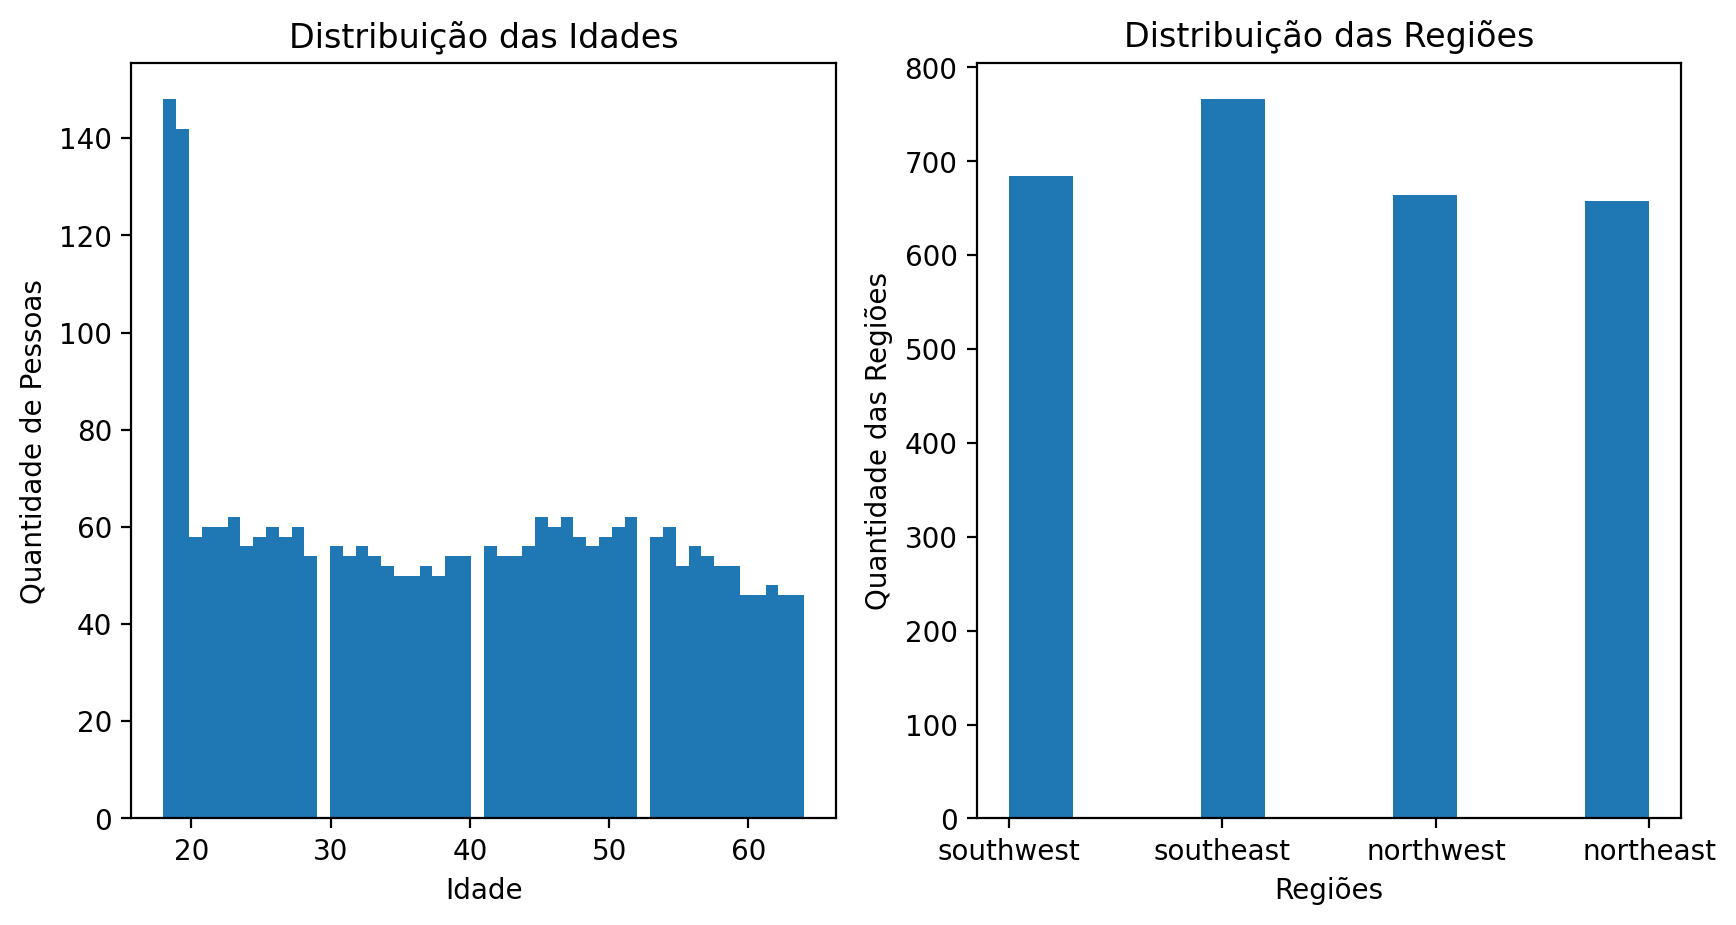

In [19]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=200)

ax[0].hist(data_backup['age'], bins=50)

ax[0].set_title('Distribuição das Idades')
ax[0].set_ylabel('Quantidade de Pessoas')
ax[0].set_xlabel('Idade')

ax[1].hist(data_backup['region'])

ax[1].set_title('Distribuição das Regiões')
ax[1].set_ylabel('Quantidade das Regiões')
ax[1].set_xlabel('Regiões')

plt.show()

<AxesSubplot:xlabel='region', ylabel='age'>

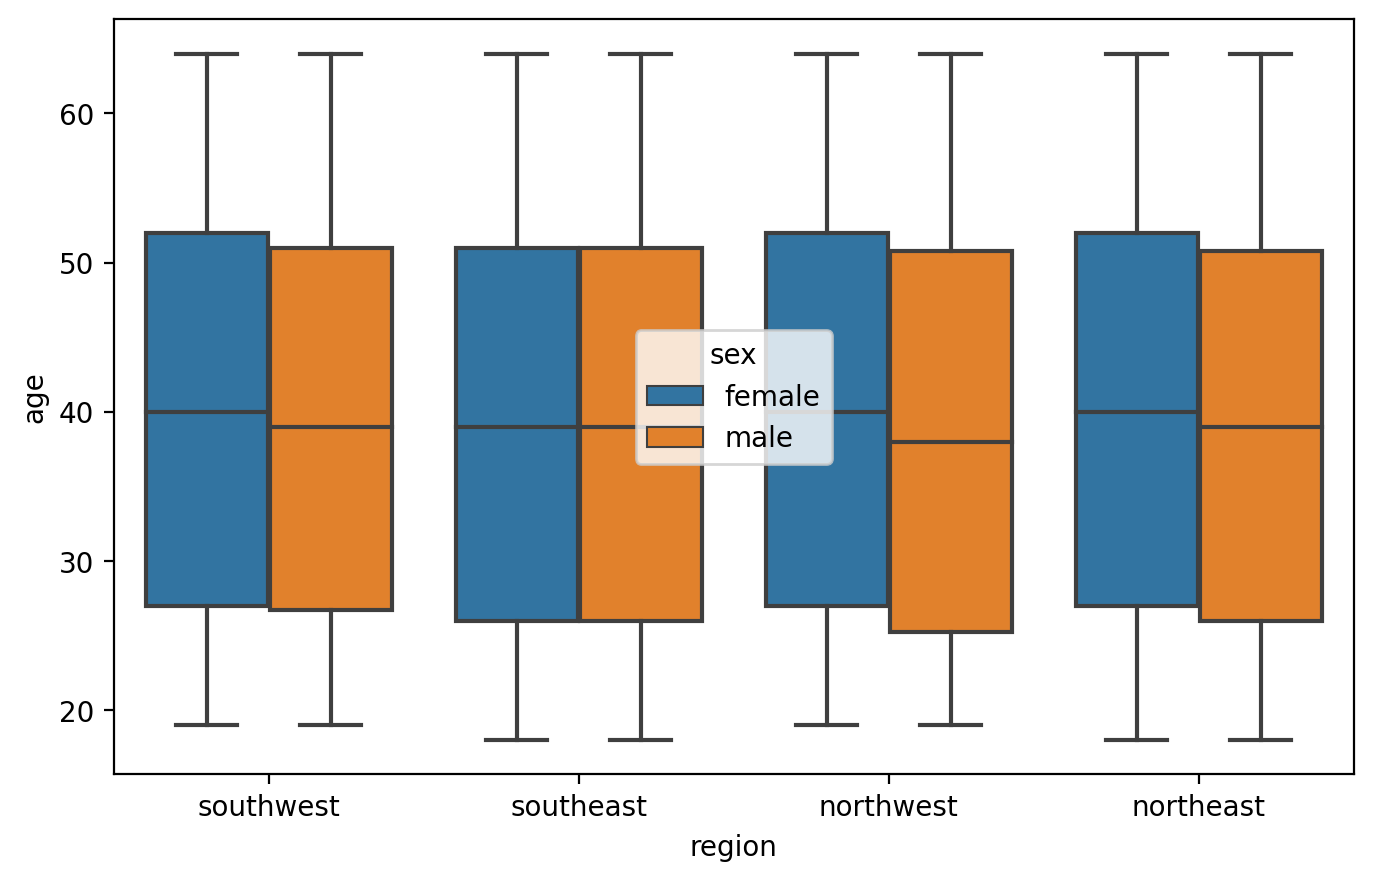

In [20]:
plt.figure(figsize=(8,5), dpi=200)

sns.boxplot(x='region', y='age', hue='sex', data=data_backup)

In [61]:
data_backup.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


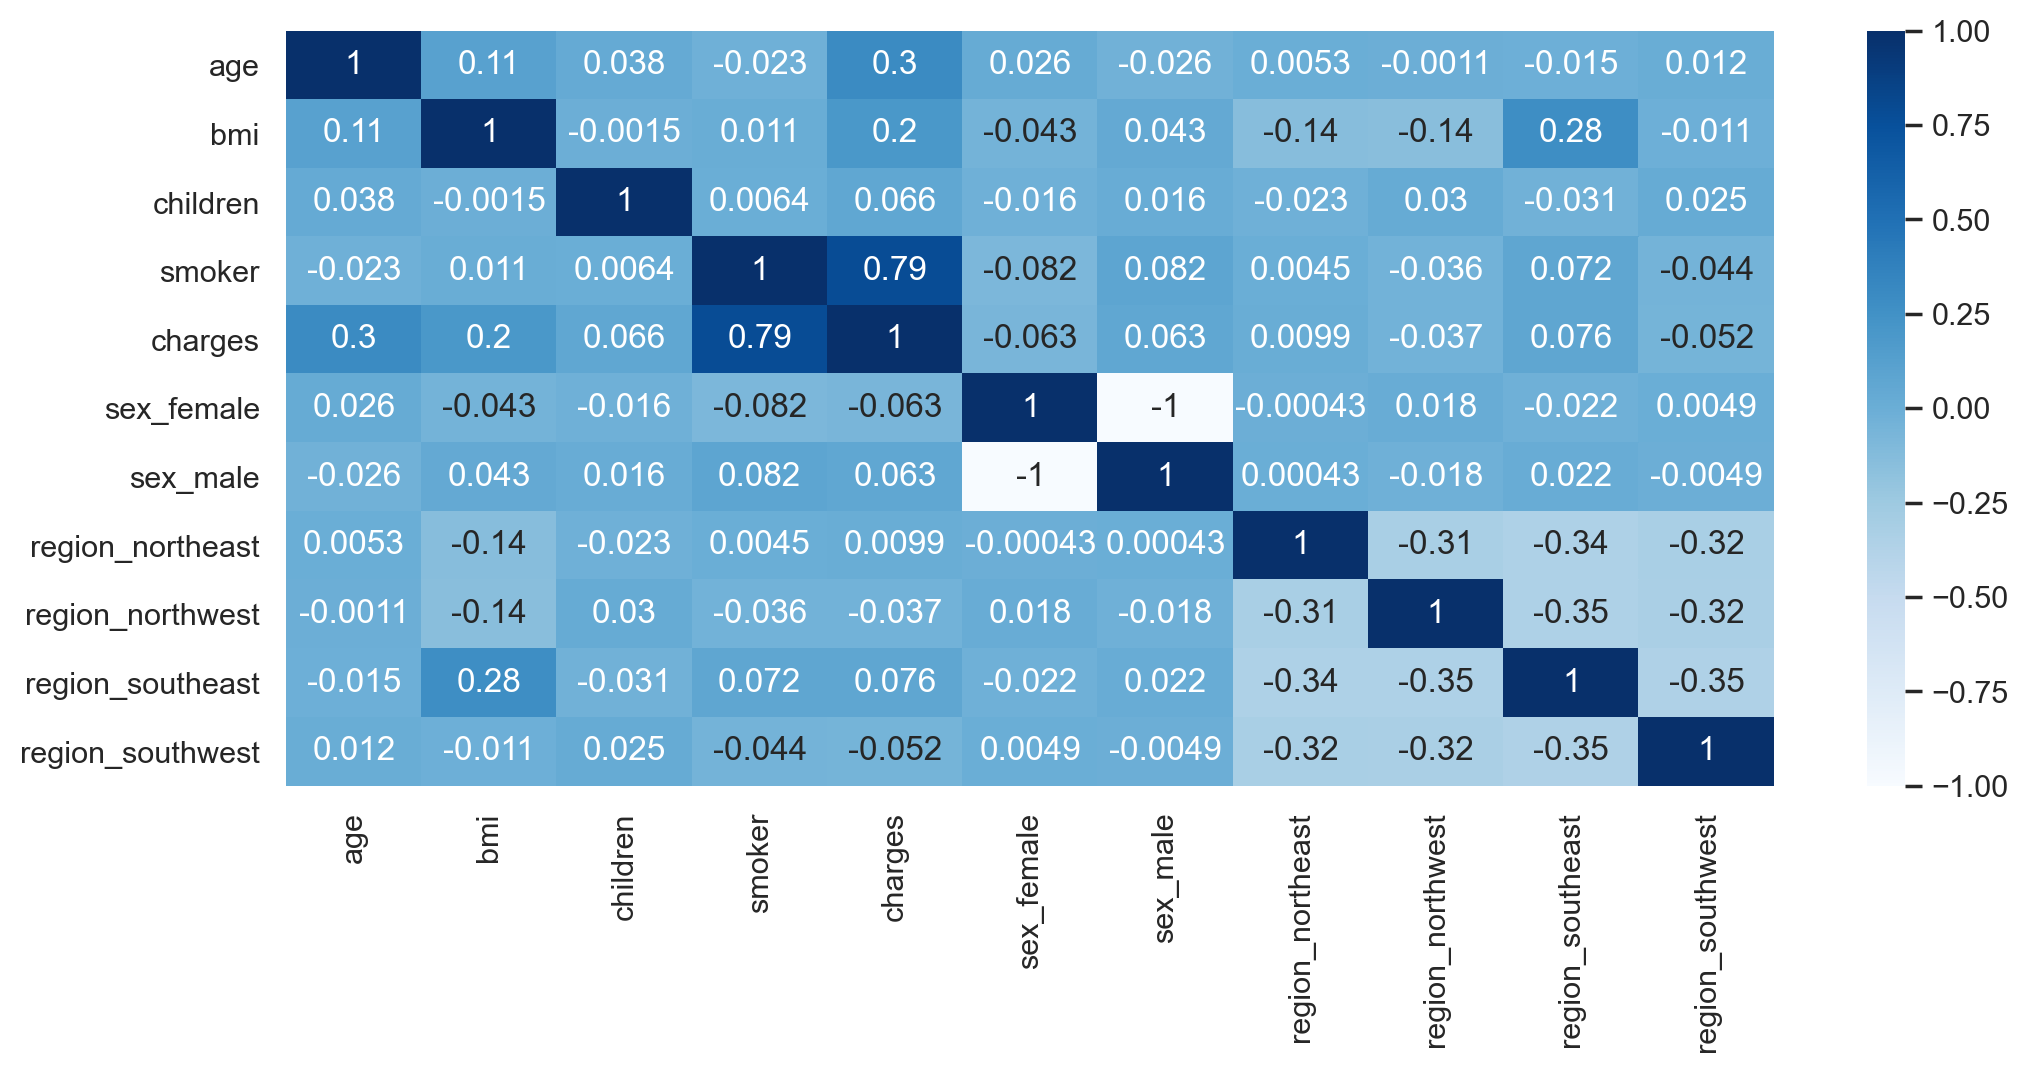

In [37]:
plt.figure(figsize=(12,5), dpi=200)

sns.heatmap(data[['age', 'bmi', 'children', 'smoker', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']].corr(), cmap='Blues', annot=True)

plt.show()

In [39]:
data.corr()['charges'].sort_values() 

# Observando os valores que mais influenciam a coluna 'charges'

sex_female         -0.062837
region_southwest   -0.051686
region_northwest   -0.036874
region_northeast    0.009850
sex_male            0.062837
children            0.066442
region_southeast    0.075652
bmi                 0.199846
age                 0.298624
smoker              0.788783
charges             1.000000
Name: charges, dtype: float64

1 - Quais são os factores mais importantes que afectam as despesas médicas?

- Ser fumante ou não, Idade, IMC

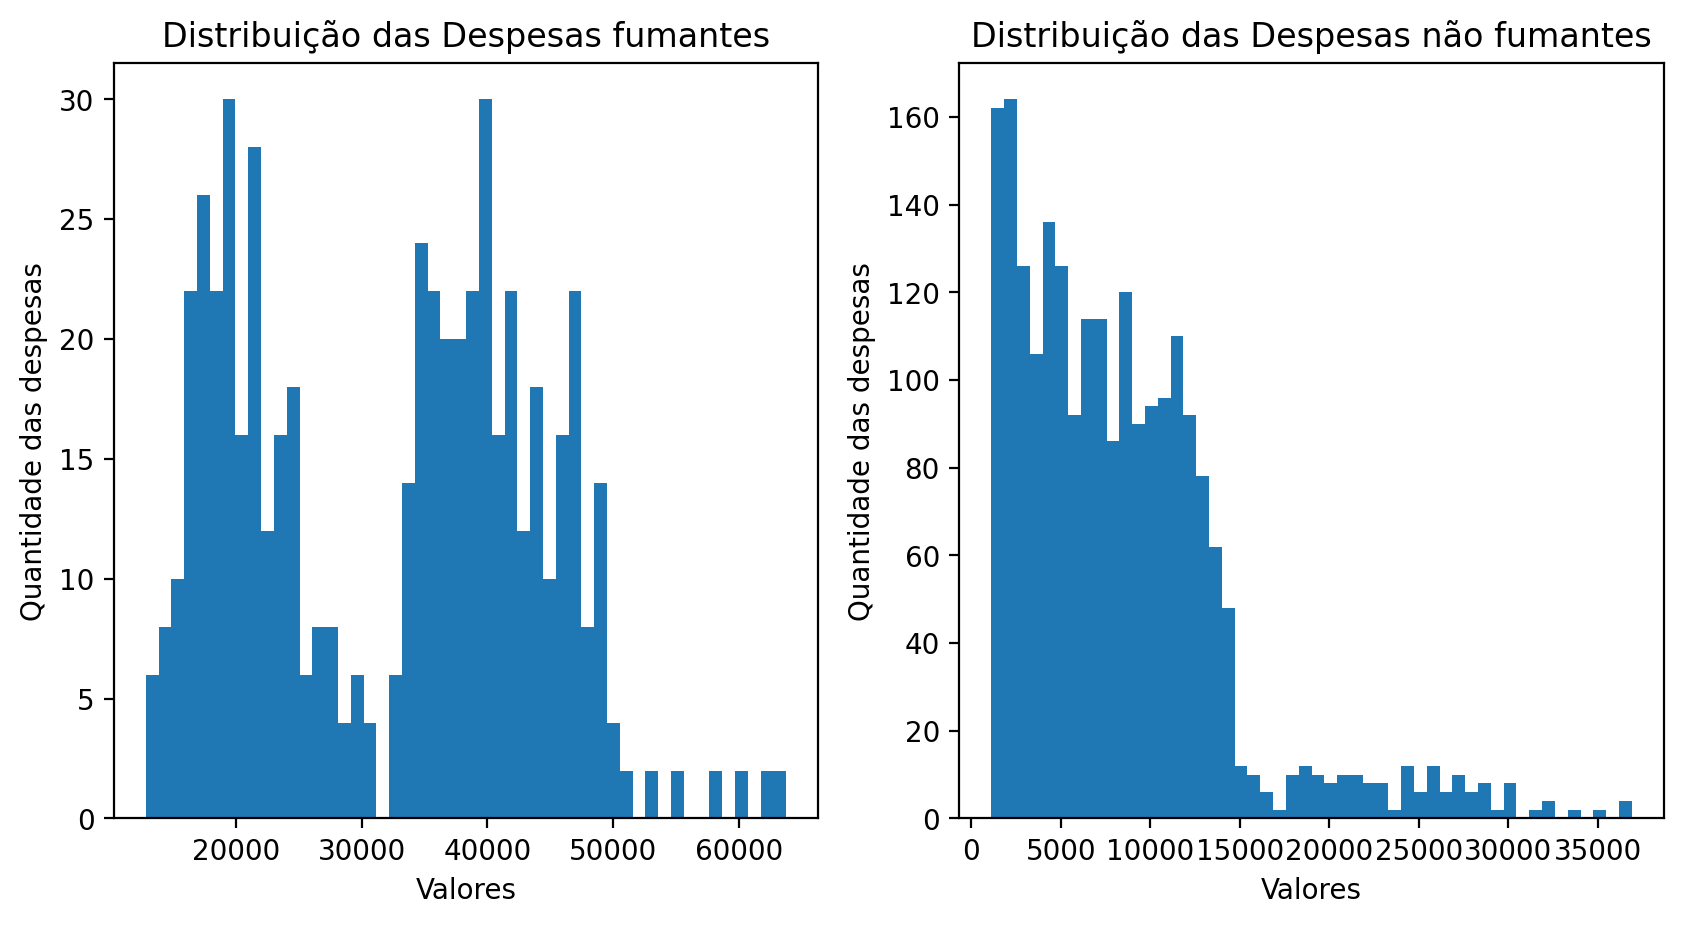

In [23]:
f, ax = plt.subplots(1,2, figsize=(10,5), dpi=200)

ax[0].hist(clientes_fumantes['charges'], bins=50)

ax[0].set_title('Distribuição das Despesas fumantes')
ax[0].set_ylabel('Quantidade das despesas')
ax[0].set_xlabel('Valores')

ax[1].hist(clientes_nao_fumantes['charges'], bins=50)

ax[1].set_title('Distribuição das Despesas não fumantes')
ax[1].set_ylabel('Quantidade das despesas')
ax[1].set_xlabel('Valores')

plt.show()

# 2. Feature Engineering 

In [24]:
# Analisando as colunas

print('Sexos: ', data['sex'].unique()) 
print('Região: ',data['region'].unique())

Sexos:  ['female' 'male']
Região:  ['southwest' 'southeast' 'northwest' 'northeast']


2 Valores para a coluna 'Sex' e 4 valores para coluna 'region'

In [25]:
# Transformando o valor da coluna 'Sex' para duas colunas 'male' e 'female', com valores 0 e 1 

sex_status = pd.get_dummies(data['sex'], prefix='sex')

data = pd.concat([data, sex_status], axis=1)

data.drop('sex', axis=1, inplace=True)

In [26]:
# Transformando o valor da coluna 'region' para 4 colunas, 'region_northeast', 'region_northwest', 'region_southeast' e 'region_southwest', com valores 0 e 1

region_status = pd.get_dummies(data['region'], prefix='region')

data = pd.concat([data, region_status], axis=1)

data.drop('region', axis=1, inplace=True)

In [27]:
# Transformando o valor da coluna 'smoker' que é categórica em numérica

label_encoder = LabelEncoder()

data['smoker'] = label_encoder.fit_transform(data['smoker'])

In [28]:
data['charges'] = data['charges'].round(3) # Arrendondando para 3 casas decimas os valores da tabela

In [29]:
data.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,16884.924,1,0,0,0,0,1
1,18,33.770,1,0,1725.552,0,1,0,0,1,0
2,28,33.000,3,0,4449.462,0,1,0,0,1,0
3,33,22.705,0,0,21984.471,0,1,0,1,0,0
4,32,28.880,0,0,3866.855,0,1,0,1,0,0


# 3. Machine Learning

In [30]:
X = data.drop('charges', axis=1)
y = data['charges']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# Criando um dicionário com os modelos

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Ada Boost': AdaBoostRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Linear SVR': LinearSVR()
}

Resultados para: Linear Regression
Erro Quadrático Médio: 40004195.87570575
Erro médio absoluto: 4224.767533835139
R-Quadrado Score: 0.7443308120385346



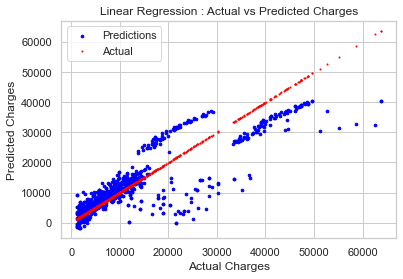

Resultados para: Decision Tree
Erro Quadrático Médio: 15129450.021492224
Erro médio absoluto: 881.7840600961538
R-Quadrado Score: 0.9033067877850387



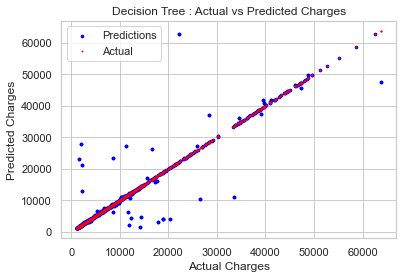

Resultados para: Random Forest
Erro Quadrático Médio: 10876294.910592565
Erro médio absoluto: 1502.180877415866
R-Quadrado Score: 0.9304889542971831



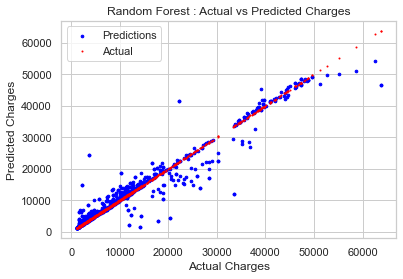

Resultados para: SVR
Erro Quadrático Médio: 170358721.75974292
Erro médio absoluto: 8474.560141749818
R-Quadrado Score: -0.08877269248943032



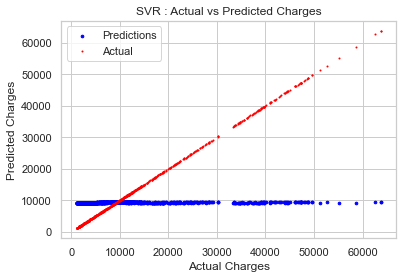

Resultados para: XGBoost
Erro Quadrático Médio: 10204680.412744464
Erro médio absoluto: 1361.247044557425
R-Quadrado Score: 0.9347812823775046



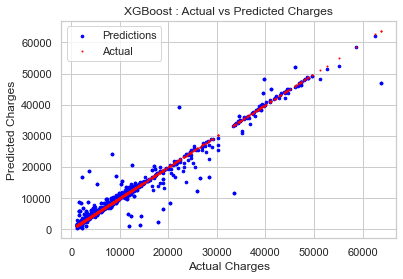

Resultados para: Gradient Boosting Regressor
Erro Quadrático Médio: 18992796.601093646
Erro médio absoluto: 2294.2538149421043
R-Quadrado Score: 0.8786159107108105



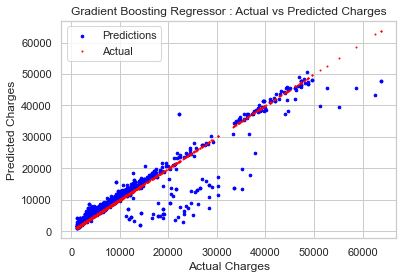

Resultados para: Ada Boost
Erro Quadrático Médio: 29441916.80833655
Erro médio absoluto: 4291.304489296903
R-Quadrado Score: 0.8118349638671839



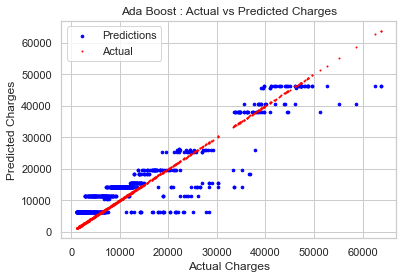

Resultados para: K-Neighbors Regressor
Erro Quadrático Médio: 97092227.35215528
Erro médio absoluto: 6150.543715625001
R-Quadrado Score: 0.3794778177363478



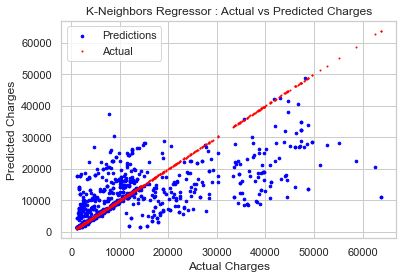

Resultados para: Linear SVR
Erro Quadrático Médio: 175027361.40657505
Erro médio absoluto: 6789.848631836993
R-Quadrado Score: -0.11861024530761233



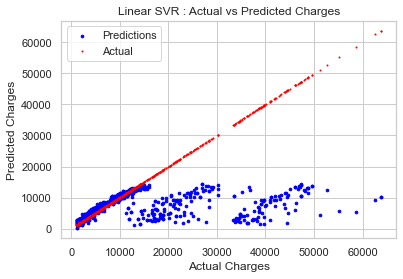

In [60]:
names = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR']

accuracy = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Resultados para: {name}')
    print(f'Erro Quadrático Médio: {mse}')
    print(f'Erro médio absoluto: {mae}')
    print(f'R-Quadrado Score: {r2}')
    accuracy.append(r2)
    print()
    
    plt.scatter(y_test, y_pred, color='blue', label='Predictions', s=7)
    plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'{name} : Actual vs Predicted Charges')
    plt.legend()
    plt.show()


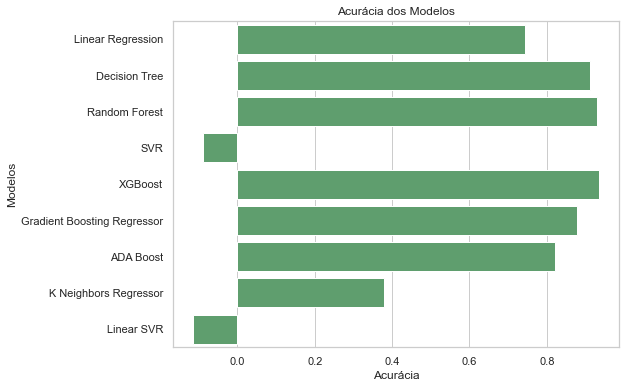

In [34]:
data_acuracia = pd.DataFrame({"Models":names, "Accuracy": accuracy})

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.barplot(x="Accuracy", y="Models", data=data_acuracia, color='g')

plt.xlabel("Acurácia")
plt.ylabel("Modelos")
plt.title("Acurácia dos Modelos")

plt.show()

In [35]:
data_acuracia

,Models,Accuracy
0,Linear Regression,0.744331
1,Decision Tree,0.912073
2,Random Forest,0.930483
3,SVR,-0.088773
4,XGBoost,0.934781
5,Gradient Boosting Regressor,0.878616
6,ADA Boost,0.820046
7,K Neighbors Regressor,0.379478
8,Linear SVR,-0.114336
